# Projet 2


In [333]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Question 1 


### MATRICE DES FREQUENCES RELATIVE

In [362]:
K = np.array([ 
              [1740, 920 ,  1560,  2210,  990 ,  1240],
              [1770, 820 ,  1260,  2010,  1680,  2090],
              [2110, 1170,  1640,  1500,  550 ,  430 ],
              [1940, 1130,  1750,  1660,  770 ,  1140],
              [1650, 890 ,  1350,  2540,  2090,  3230],
              [2290, 1070,  1420,  1830,  1260,  2330],
              [820 , 1260,  2460,  3330,  2170,  2960],
              [870 , 330 ,  730 ,  680 ,  470 ,  890 ],
              
              ])

# K = np.array([[2,2],
#                 [1,3],
#                 [3,1]])

# K = np.array([[1,0,0],
#               [1,1,0],
#               [0,0,2],
#               [1,0,2],
#               [1,2,2],
              
#         ])


df = pd.DataFrame(K)
df
ki = np.sum(K, axis=1)
kj = np.sum(K, axis=0)

ki_kj = np.hstack((K, ki.reshape(-1, 1)))

arr = np.vstack((ki_kj, np.append(kj, np.sum(ki))))
arr

df = pd.DataFrame(arr)
F = np.round(K,decimals=5)
new_column_names = []

for column_name in df.columns:
    new_column_names.append(str(column_name + 1))
    if (column_name == len(df.columns) - 1 ):
        new_column_names[column_name] = 'ki+'

df.columns = new_column_names

new_row_names = []
for row_index in df.index:
    new_row_names.append(str(row_index + 1))
    if (row_index == len(df) - 1 ):
            new_row_names[row_index] = 'k+j'

df.index = new_row_names

print("Matrice de contigence")
df



Matrice de contigence


,1,2,3,4,5,6,ki+
1,1740,920,1560,2210,990,1240,8660
2,1770,820,1260,2010,1680,2090,9630
3,2110,1170,1640,1500,550,430,7400
4,1940,1130,1750,1660,770,1140,8390
5,1650,890,1350,2540,2090,3230,11750
6,2290,1070,1420,1830,1260,2330,10200
7,820,1260,2460,3330,2170,2960,13000
8,870,330,730,680,470,890,3970
k+j,13190,7590,12170,15760,9980,14310,73000


### MATRICE DES FREQUENCES MARGINALES

In [335]:
n = np.sum(K)

F = K / n

fi = np.sum(F, axis=1)
fj = np.sum(F, axis=0)

fi_fj = np.hstack((F, fi.reshape(-1, 1)))

arr = np.vstack((fi_fj, np.append(fj, np.sum(fi))))
arr

df = pd.DataFrame(arr)
F = np.round(F,decimals=5)
new_column_names = []

for column_name in df.columns:
    new_column_names.append(str(column_name + 1))
    if (column_name == len(df.columns) - 1 ):
        new_column_names[column_name] = 'fi+'

df.columns = new_column_names

new_row_names = []
for row_index in df.index:
    new_row_names.append(str(row_index + 1))
    if (row_index == len(df) - 1 ):
            new_row_names[row_index] = 'f+j'

df.index = new_row_names

print("Matrice des frequences relatives")
df

Matrice des frequences relatives


,1,2,3,4,5,6,fi+
1,0.023836,0.012603,0.021370,0.030274,0.013562,0.016986,0.118630
2,0.024247,0.011233,0.017260,0.027534,0.023014,0.028630,0.131918
3,0.028904,0.016027,0.022466,0.020548,0.007534,0.005890,0.101370
4,0.026575,0.015479,0.023973,0.022740,0.010548,0.015616,0.114932
5,0.022603,0.012192,0.018493,0.034795,0.028630,0.044247,0.160959
6,0.031370,0.014658,0.019452,0.025068,0.017260,0.031918,0.139726
7,0.011233,0.017260,0.033699,0.045616,0.029726,0.040548,0.178082
8,0.011918,0.004521,0.010000,0.009315,0.006438,0.012192,0.054384
f+j,0.180685,0.103973,0.166712,0.215890,0.136712,0.196027,1.000000


## QUESTION 2


### MATRICE DES PROFILS LIGNES



In [336]:
p =  np.sum(F, axis=1)

matrice_profile_ligne = np.zeros(F.shape)

for i in range(K.shape[0]):
    for j in range(K.shape[1]): 
      matrice_profile_ligne[i][j] = F[i][j] / p[i]

df = pd.DataFrame(matrice_profile_ligne)
df[str(len(df.columns))] = matrice_profile_ligne.sum(axis=1)

print("Matrice des profils-lignes ")
df

Matrice des profils-lignes 


,0,1,2,3,4,5,6
0,0.200961,0.106213,0.180140,0.255163,0.114305,0.143218,1.0
1,0.183837,0.085134,0.130847,0.208703,0.174437,0.217042,1.0
2,0.285094,0.158134,0.221663,0.202723,0.074282,0.058104,1.0
3,0.231251,0.134679,0.208544,0.197842,0.091787,0.135897,1.0
4,0.140416,0.075738,0.114880,0.216154,0.177881,0.274930,1.0
5,0.224504,0.104917,0.139197,0.179417,0.123524,0.228441,1.0
6,0.063058,0.096917,0.189230,0.256163,0.166938,0.227694,1.0
7,0.219158,0.083104,0.183857,0.171355,0.118404,0.224122,1.0


### MATRICE DES PROFILS COLONNES



In [337]:
q = F.sum(axis=0)

matrice_profile_colonne = np.zeros(F.shape)
matrice_profile_colonne = np.round(matrice_profile_colonne,decimals=4)

for i in range(F.shape[0]):
    for j in range(F.shape[1]): 
      matrice_profile_colonne[i][j] = F[i][j] / q[j]
matrice_profile_colonne


df = pd.DataFrame(matrice_profile_colonne)
df.loc[len(df)] = matrice_profile_colonne.sum(axis=0)

print("Matrice des profils-colonnes ")
df

Matrice des profils-colonnes 


,0,1,2,3,4,5
0,0.131939,0.121189,0.128187,0.140210,0.099188,0.086666
1,0.134208,0.108012,0.103533,0.127519,0.168312,0.146042
2,0.159942,0.154179,0.134785,0.095187,0.055080,0.030045
3,0.147103,0.148889,0.143783,0.105331,0.077171,0.079678
4,0.125076,0.117245,0.110911,0.161147,0.209421,0.225719
5,0.173612,0.141002,0.116670,0.116124,0.126253,0.162824
6,0.062151,0.166009,0.202147,0.211311,0.217468,0.206846
7,0.065969,0.043474,0.059984,0.043170,0.047107,0.062181
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### CENTRE DE GRAVITE

In [338]:
g_j = np.sqrt(p)
print('le centre de gravité de 𝑁′(𝐽)')
df = pd.DataFrame(g_j).T

new_column_names = []

for column_name in df.columns:
    new_column_names.append('f'+str(column_name + 1)+'+')

df.columns = new_column_names
df


le centre de gravité de 𝑁′(𝐽)


,f1+,f2+,f3+,f4+,f5+,f6+,f7+,f8+
0,0.344427,0.363194,0.318387,0.339028,0.401186,0.373805,0.422007,0.233217


In [339]:
g_l = np.sqrt(q)
print('le centre de gravité de 𝑁′(𝐼)')
df = pd.DataFrame(g_l)

new_row_names = []
for row_index in df.index:
    new_row_names.append('f+' + str(row_index + 1))

df.index = new_row_names
df

le centre de gravité de 𝑁′(𝐼)


,0
f+1,0.425076
f+2,0.322444
f+3,0.408301
f+4,0.464640
f+5,0.369743
f+6,0.442764


## QUESTION 3

### X_L transformée

In [340]:

X_L = np.zeros(F.shape)

for i in range(X_L.shape[0]):
    for j in range(X_L.shape[1]): 
      X_L[i][j] = (F[i][j] / (p[i] * g_l[j]))

print('La Matrice profil ligne transformée')
pd.DataFrame(X_L)

La Matrice profil ligne transformée


,0,1,2,3,4,5
0,0.472764,0.329399,0.441194,0.549163,0.309147,0.323464
1,0.432481,0.264027,0.320466,0.449172,0.471779,0.490198
2,0.670689,0.490422,0.542891,0.436301,0.200903,0.131230
3,0.544022,0.417682,0.510759,0.425797,0.248245,0.306929
4,0.330332,0.234887,0.281362,0.465208,0.481094,0.620940
5,0.528151,0.325380,0.340917,0.386143,0.334080,0.515942
6,0.148345,0.300571,0.463457,0.551315,0.451497,0.514256
7,0.515573,0.257730,0.450298,0.368791,0.320233,0.506189


In [341]:

Y_C = np.zeros(F.shape)

X_C = np.zeros((F.shape[0],F.shape[1]))
for i in range(X_C.shape[0]):
    for j in range(X_C.shape[1]): 
      X_C[i][j] = (F[i][j] / (q[j] * g_j[i]))
      Y_C[i][j] = X_C[i][j] - g_j[i]

print('La Matrice profil colonne transformée')

pd.DataFrame(X_C)

La Matrice profil colonne transformée


,0,1,2,3,4,5
0,0.383067,0.351856,0.372174,0.407083,0.287980,0.251624
1,0.369521,0.297394,0.285063,0.351103,0.463423,0.402103
2,0.502353,0.484251,0.423337,0.298968,0.172998,0.094366
3,0.433896,0.439165,0.424102,0.310686,0.227623,0.235018
4,0.311766,0.292247,0.276458,0.401676,0.522006,0.562630
5,0.464446,0.377208,0.312114,0.310654,0.337750,0.435585
6,0.147274,0.393381,0.479014,0.500729,0.515317,0.490147
7,0.282867,0.186411,0.257205,0.185107,0.201988,0.266624


### Y_L

In [342]:
Y_L = np.zeros(F.shape)
Y_L = X_L - g_l
Y_L = np.round(Y_L, decimals=9)

print('La Matrice profil ligne transformée centrée')

pd.DataFrame(Y_L)


La Matrice profil ligne transformée centrée


,0,1,2,3,4,5
0,0.047688,0.006955,0.032892,0.084524,-0.060596,-0.119300
1,0.007404,-0.058417,-0.087835,-0.015468,0.102036,0.047434
2,0.245613,0.167978,0.134590,-0.028339,-0.168841,-0.311534
3,0.118946,0.095238,0.102458,-0.038842,-0.121498,-0.135835
4,-0.094745,-0.087557,-0.126940,0.000568,0.111351,0.178176
5,0.103074,0.002936,-0.067384,-0.078496,-0.035663,0.073178
6,-0.276731,-0.021873,0.055156,0.086675,0.081754,0.071491
7,0.090497,-0.064714,0.041997,-0.095848,-0.049510,0.063424


###  Y_C


In [343]:
Y_C = np.zeros(F.shape)
Y_C = X_C.T - g_j
Y_C = np.round(Y_C, decimals=9)

print('La Matrice profil colonne transformée centrée')

pd.DataFrame(Y_C)

La Matrice profil colonne transformée centrée


,0,1,2,3,4,5,6,7
0,0.038640,0.006327,0.183966,0.094868,-0.089420,0.090642,-0.274733,0.049651
1,0.007429,-0.065800,0.165865,0.100137,-0.108939,0.003403,-0.028626,-0.046806
2,0.027747,-0.078132,0.104951,0.085074,-0.124727,-0.061691,0.057007,0.023988
3,0.062656,-0.012091,-0.019419,-0.028342,0.000491,-0.063151,0.078722,-0.048109
4,-0.056447,0.100229,-0.145389,-0.111405,0.120820,-0.036055,0.093310,-0.031228
5,-0.092803,0.038909,-0.224020,-0.104010,0.161445,0.061781,0.068140,0.033408


### D_l

In [344]:
D_l = np.diag(p)
pd.DataFrame(D_l)

,0,1,2,3,4,5,6,7
0,0.11863,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.13191,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.10137,0.00000,0.00000,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.11494,0.00000,0.00000,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.16095,0.00000,0.00000,0.00000
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.13973,0.00000,0.00000
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17809,0.00000
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05439


### D_j


In [345]:
D_j = np.diag(q)
pd.DataFrame(D_j)

,0,1,2,3,4,5
0,0.18069,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00000,0.10397,0.00000,0.00000,0.00000,0.00000
2,0.00000,0.00000,0.16671,0.00000,0.00000,0.00000
3,0.00000,0.00000,0.00000,0.21589,0.00000,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.13671,0.00000
5,0.00000,0.00000,0.00000,0.00000,0.00000,0.19604


### Valeurs propres, inertie ...

In [346]:
V_l = (Y_L.T.dot(D_l)).dot(Y_L)
# R = np.array([ [ 1 ,  0  , -1],
#                [ 0 ,  1  , 0],
#                [-1 , 0  , 1],
#               ])

valeurs_propres_L, vecteur_propres_L = np.linalg.eig(V_l)

indices_tries = np.argsort(valeurs_propres_L)[::-1]
valeurs_propres_L = valeurs_propres_L[indices_tries]
valeurs_propres_L = np.round(valeurs_propres_L,decimals = 9)
vecteur_propres_L = vecteur_propres_L[:, indices_tries]
Inertie = valeurs_propres_L / np.trace(V_l)
Inertie

Inertie_cumul = np.cumsum(Inertie)
Inertie_cumul

valeurs_propres_L = np.round(valeurs_propres_L,decimals=4)
Inertie_cumul = np.round(Inertie_cumul,decimals=4)
Inertie = np.round(Inertie,decimals=4)

dataframe = pd.DataFrame({'valeurs_propres': valeurs_propres_L, 'Inertie': Inertie, 'Inertie_cumul': Inertie_cumul})
print("Les valeurs propres de la matrice La Matrice d\'inertie du nuage des profils lignes")
dataframe

Les valeurs propres de la matrice La Matrice d'inertie du nuage des profils lignes


,valeurs_propres,Inertie,Inertie_cumul
0,0.0550,0.7471,0.7471
1,0.0149,0.2025,0.9496
2,0.0024,0.0324,0.9820
3,0.0008,0.0106,0.9926
4,0.0005,0.0074,1.0000
5,0.0000,0.0000,1.0000


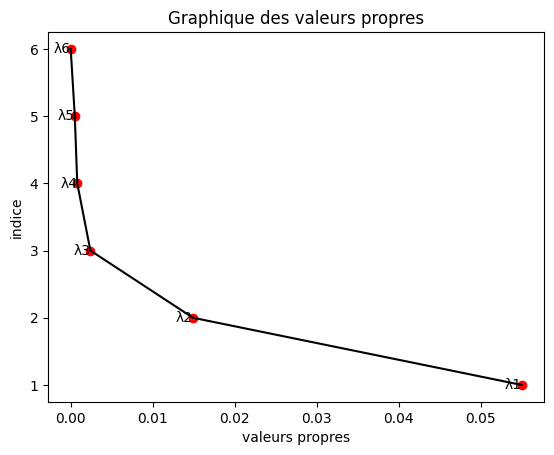

In [347]:
indices = np.arange(len(valeurs_propres_L))

composantes = np.arange(1, len(valeurs_propres_L) + 1)

plt.scatter(valeurs_propres_L, composantes, marker='o', color='r')
plt.plot(valeurs_propres_L, composantes, linestyle='-', color='black')


for i, valeur_propre in enumerate(valeurs_propres_L):
    plt.text(valeur_propre, composantes[i], f'λ{i+1}', ha='right', va='center')

plt.xlabel('valeurs propres')
plt.ylabel('indice')
plt.title('Graphique des valeurs propres')
plt.show()

## Question 4

### Les axes principaux de l’ACP des profils-lignes

In [348]:

indices_axes_principaux = np.where(Inertie_cumul >= 0.8)[0][:2]  # Sélection des 2 premiers axes
axes_principaux_L = vecteur_propres_L[:, indices_axes_principaux]
axes_principaux_L  = np.round(axes_principaux_L,decimals=4)
dataframe = pd.DataFrame(axes_principaux_L)
dataframe.columns = ['Axe 1', 'Axe 2']
dataframe


,Axe 1,Axe 2
0,0.6406,0.1760
1,-0.1845,-0.1584
2,-0.4997,-0.4895
3,-0.4049,0.5253
4,0.0358,0.4186
5,0.3752,-0.5031


### Les axes principaux de l’ACP des profils-colonnes

In [349]:
V_j = (Y_C.T.dot(D_j)).dot(Y_C)

valeurs_propres_C, vecteur_propres_C = np.linalg.eig(V_j)

indices_tries = np.argsort(valeurs_propres_C)[::-1]
valeurs_propres_C = valeurs_propres_C[indices_tries]
valeurs_propres_C = np.round(valeurs_propres_C,decimals = 9)
vecteur_propres_C = vecteur_propres_C[:, indices_tries]

Inertie = valeurs_propres_C / np.trace(V_j)
Inertie

Inertie_cumul = np.cumsum(Inertie)


In [350]:

indices_axes_principaux = np.where(Inertie_cumul >= 0.8)[0][:2]  # Sélection des 2 premiers axes
axes_principaux_C = vecteur_propres_C[:, indices_axes_principaux]
axes_principaux_C  = np.round(axes_principaux_C,decimals=4)

dataframe = pd.DataFrame(axes_principaux_C)
dataframe.columns = ['Axe 1', 'Axe 2']
dataframe


,Axe 1,Axe 2
0,-0.1927,0.4950
1,0.2591,0.4775
2,-0.1365,0.1428
3,-0.0893,-0.3275
4,0.2940,0.1361
5,0.4809,-0.3237
6,-0.7123,-0.2456
7,0.2096,-0.4645


## Question 5

In [351]:
# Z = np.array([
#     [-1 ,  1 ,  1],
#     [-1 , -1 ,  1],
#     [ 1 ,  1 , -1],
#     [ 1 , -1 , -1],
#     ])

Facteur_Lignes = Y_L.dot(axes_principaux_L)

Facteur_Lignes = np.round(Facteur_Lignes,decimals=4)
dataframe = pd.DataFrame(Facteur_Lignes)
dataframe.columns = ['C1', 'C2']
dataframe



,C1,C2
0,-0.0683,0.0702
1,0.0871,0.0643
2,-0.0524,0.0219
3,-0.0322,-0.0472
4,0.0895,0.0166
5,0.1571,-0.0423
6,-0.2061,-0.0285
7,0.1098,-0.0974


## Question 6


### Contribution relative

In [352]:
individu = Y_L[:, indices_axes_principaux]
individu = np.linalg.norm(individu, axis=0)
individu = np.square (individu)

Contribution = np.square (Facteur_Lignes) 

Contribution_cumul = np.cumsum(Contribution, axis=0)
Contribution = Contribution_cumul / individu
Contribution = np.round(Contribution,decimals=4)

dataframe = pd.DataFrame({'Contribution 1 ':Contribution[::,0], 'Contribution 2 ':Contribution[::,1]})

dataframe

,Contribution 1,Contribution 2
0,0.0879,0.0784
1,0.2308,0.1441
2,0.2825,0.1518
3,0.3020,0.1872
4,0.4529,0.1916
5,0.9178,0.2201
6,1.7179,0.2330
7,1.9450,0.3839


### Contribution absolue 

In [353]:
Contribution_abs = (1 / (Facteur_Lignes.shape[0] * valeurs_propres_L[:2])) 
Contribution_abs = (np.square (Facteur_Lignes) * Contribution_abs)
Contribution_abs = np.round(Contribution_abs,decimals=4)

dataframe = pd.DataFrame({'Contribution-absolue 1 ': Contribution_abs[::,0], 'Contribution-absolue 2 ':Contribution_abs[::,1]})
dataframe 


,Contribution-absolue 1,Contribution-absolue 2
0,0.0106,0.0413
1,0.0172,0.0347
2,0.0062,0.0040
3,0.0024,0.0187
4,0.0182,0.0023
5,0.0561,0.0150
6,0.0965,0.0068
7,0.0274,0.0796


## Question 7

### Facteurs colonnes

In [354]:
Facteur_Colonnes = Y_C.dot(axes_principaux_C)
dataframe = pd.DataFrame(Facteur_Colonnes)

dataframe
Facteur_Colonnes = np.round(Facteur_Colonnes,decimals=4)

Facteur_Colonnes
dataframe = pd.DataFrame(Facteur_Colonnes)
dataframe.columns = ['C1', 'C2']
dataframe

,C1,C2
0,0.1840,0.0203
1,-0.0699,-0.0240
2,-0.1494,-0.0586
3,-0.1064,0.0553
4,0.0118,0.0553
5,0.1035,-0.0556


## Question 8

### Contribution absolue

In [355]:
Contribution_abs = (1 / (Facteur_Colonnes.shape[0] * valeurs_propres_C[:2])) 
Contribution_abs = (np.square (Facteur_Colonnes) * Contribution_abs)
Contribution_abs = np.round(Contribution_abs,decimals=4)

dataframe = pd.DataFrame({'Contribution-absolue 1 ': Contribution_abs[::,0], 'Contribution-absolue 2 ':Contribution_abs[::,1]})
dataframe 


,Contribution-absolue 1,Contribution-absolue 2
0,0.1025,0.0046
1,0.0148,0.0064
2,0.0676,0.0384
3,0.0343,0.0342
4,0.0004,0.0342
5,0.0324,0.0346


### Contributions relatives

In [356]:
individu = np.linalg.norm(individu, axis=0)
individu = Y_C[:, indices_axes_principaux]
individu = np.square (individu)

Contribution = np.square (Facteur_Colonnes) 

Contribution_cumul = np.cumsum(Contribution, axis=0)
Contribution = Contribution_cumul / individu
Contribution = np.round(Contribution,decimals=4)

dataframe = pd.DataFrame({'Contribution 1 ':Contribution[::,0], 'Contribution 2 ':Contribution[::,1]})

dataframe

,Contribution 1,Contribution 2
0,845.8714,0.0122
1,8.9482,0.0359
2,10.0028,0.4015
3,495.1296,19.8368
4,7.2192,0.4985
5,54.9792,0.2716


## Question 9

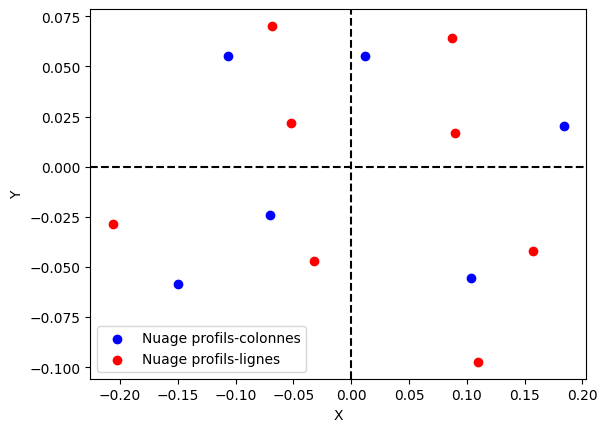

In [357]:
plt.scatter(Facteur_Colonnes[:, 0], Facteur_Colonnes[:, 1], color='blue', label='Nuage profils-colonnes')
plt.scatter(Facteur_Lignes[:, 0], Facteur_Lignes[:, 1], color='red', label='Nuage profils-lignes')

plt.axvline(0, color='black', linestyle='--')

plt.axhline(0, color='black', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()